In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
titanic_data = fetch_openml('titanic', version = 1, as_frame = True)
df = titanic_data['data']

In [3]:
df['survived'] = titanic_data['target']

In [4]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

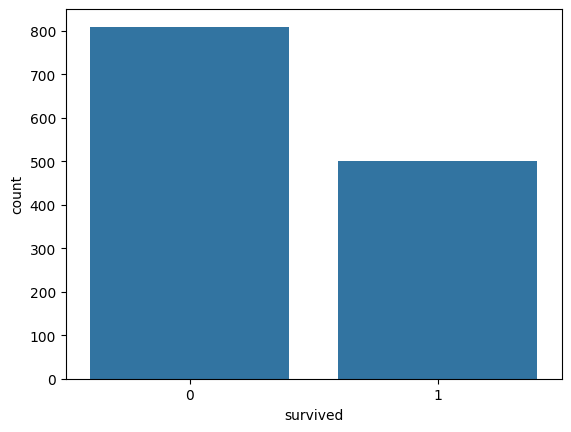

In [5]:
sns.countplot(data = df, x='survived')

<Axes: xlabel='survived', ylabel='count'>

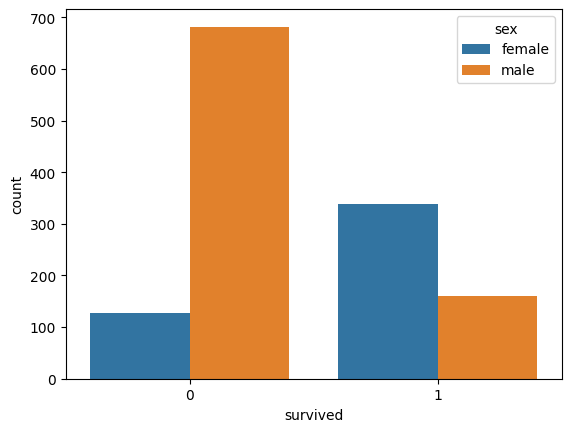

In [6]:
sns.countplot(data = df, x='survived', hue='sex')

<Axes: xlabel='survived', ylabel='count'>

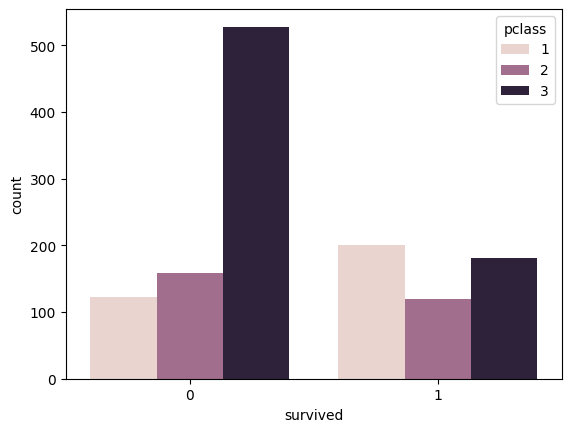

In [8]:
sns.countplot(data = df, x='survived', hue='pclass')

<Axes: ylabel='Frequency'>

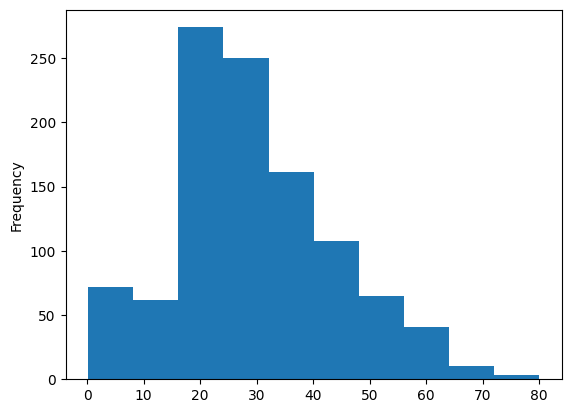

In [9]:
df['age'].plot.hist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [12]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'missing values in %'}, ylabel='percentage'>

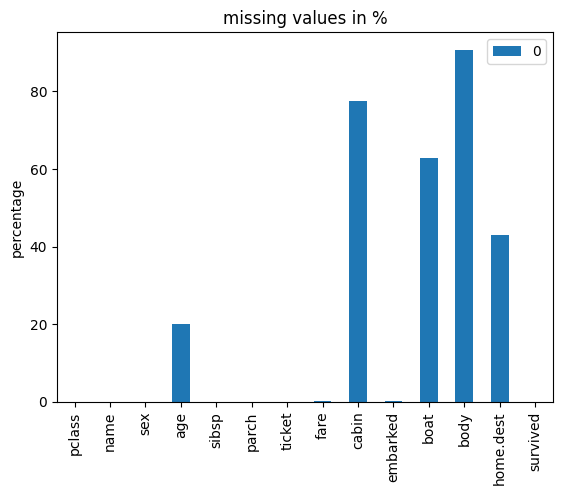

In [13]:
misval = pd.DataFrame(df.isnull().sum()/len(df)*100)
misval.plot(kind='bar', title='missing values in %', ylabel='percentage')

In [15]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0, 'travel_alone']=0
df.loc[df['family']==0, 'travel_alone']=1

In [16]:
df['family'].head()

0    0
1    3
2    3
3    3
4    3
Name: family, dtype: int64

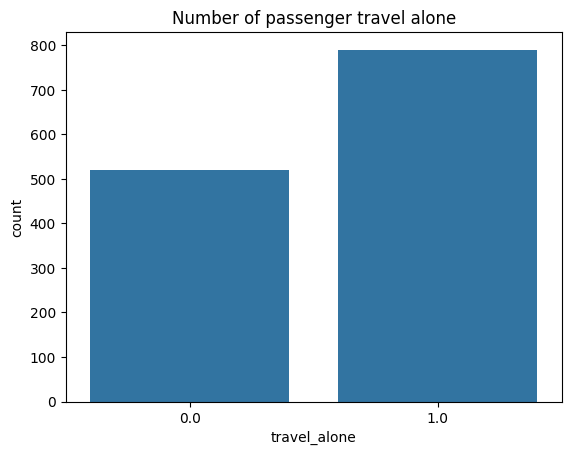

In [19]:
df.drop(['sibsp','parch'], axis=1, inplace=True)
sns.countplot(data=df, x='travel_alone')
plt.title("Number of passenger travel alone")
plt.show()

In [20]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travel_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [21]:
df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [22]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travel_alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [29]:
df.drop(['cabin','body'], axis=1, inplace=True)
df.head()

In [30]:
sex=pd.get_dummies(df['sex'], drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [31]:
df.isnull().sum()

pclass            0
sex               0
age             263
fare              1
embarked          2
boat            823
survived          0
family            0
travel_alone      0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')

In [35]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [37]:
df.drop('boat', axis=1, inplace=True)


In [38]:
df.isnull().sum()

pclass          0
sex             0
age             0
fare            0
embarked        2
survived        0
family          0
travel_alone    0
dtype: int64

In [39]:
imp_freq=SimpleImputer(strategy='most_frequent')

In [42]:
df.loc[:, 'embarked'] = imp_freq.fit_transform(df[['embarked']])

In [43]:
df.isnull().sum()

pclass          0
sex             0
age             0
fare            0
embarked        0
survived        0
family          0
travel_alone    0
dtype: int64

In [44]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travel_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [47]:
embark=pd.get_dummies(df['embarked'], drop_first=True)

In [48]:
print(embark)

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [49]:
df.drop(['embarked'], axis=1, inplace=True)
df=pd.concat([df, embark], axis=1)

In [51]:
df['Q'] = df['Q'].astype(int)
df['S'] = df['S'].astype(int)

In [53]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [54]:
df.head()

,pclass,sex,age,fare,survived,family,travel_alone,Q,S
0,1,1,29.0000,211.3375,1,0,1.0,0,1
1,1,0,0.9167,151.5500,1,3,0.0,0,1
2,1,1,2.0000,151.5500,0,3,0.0,0,1
3,1,0,30.0000,151.5500,0,3,0.0,0,1
4,1,1,25.0000,151.5500,0,3,0.0,0,1


In [57]:
X= df.drop(['survived'], axis=1)
X.head()

,pclass,sex,age,fare,family,travel_alone,Q,S
0,1,1,29.0000,211.3375,0,1.0,0,1
1,1,0,0.9167,151.5500,3,0.0,0,1
2,1,1,2.0000,151.5500,3,0.0,0,1
3,1,0,30.0000,151.5500,3,0.0,0,1
4,1,1,25.0000,151.5500,3,0.0,0,1


In [58]:
y=df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
print(X_train.shape, y_train.shape)


(916, 8) (916,)


In [62]:
print(X_test.shape, y_test.shape)

(393, 8) (393,)


In [63]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)

C:\Users\pulki\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [64]:
pred= mod.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7989821882951654

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[204,  32],
       [ 47, 110]])